## Creating CNN Using Scratch And Transfer Learning

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Please download the dataset from the below url

In [ ]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,Conv2D
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [ ]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = 'drive/My Drive/Dataset2/cell_images'
valid_path = 'drive/My Drive/Dataset/Test'


In [ ]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

mobilnet = VGG19(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)




80142336/80134624 [==============================] - 3s 0us/step


In [ ]:
# don't train existing weights
for layer in mobilnet.layers:
    layer.trainable = False

In [ ]:
  # useful for getting number of output classes
folders = glob('drive/My Drive/Dataset2/cell_images/*')

In [ ]:
folders

['drive/My Drive/Dataset2/cell_images/Uninfected',
 'drive/My Drive/Dataset2/cell_images/Parasitized']

In [ ]:
# our layers - you can add more if you want
x = Flatten()(mobilnet.output)

In [ ]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=mobilnet.input, outputs=prediction)

In [ ]:

# view the structure of the model
model.summary()


Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)      

In [ ]:
from tensorflow.keras.layers import MaxPooling2D

In [ ]:
### Create Model from scratch using CNN
model=Sequential()
model.add(Conv2D(filters=16,kernel_size=2,padding="same",activation="relu",input_shape=(224,224,3)))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=32,kernel_size=2,padding="same",activation ="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=64,kernel_size=2,padding="same",activation="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Flatten())
model.add(Dense(500,activation="relu"))
model.add(Dense(2,activation="softmax"))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 16)      208       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 112, 32)      2080      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 56, 56, 64)        8256      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 28, 28, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 50176)             0

In [ ]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [ ]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('drive/My Drive/Dataset2/cell_images',
                                                 target_size = (224, 224),
                                                 batch_size = 80,
                                                 class_mode = 'categorical')

Found 15998 images belonging to 2 classes.


In [ ]:
training_set

In [ ]:
test_set = test_datagen.flow_from_directory('drive/My Drive/Dataset/Test',
                                            target_size = (224, 224),
                                            batch_size = 80,
                                            class_mode = 'categorical')

Found 134 images belonging to 2 classes.


In [ ]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=8,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/8
200/200 [==============================] - 9937s 50s/step - loss: 0.7162 - accuracy: 0.6518 - val_loss: 0.5032 - val_accuracy: 0.7612
Epoch 2/8
200/200 [==============================] - 205s 1s/step - loss: 0.2520 - accuracy: 0.9039 - val_loss: 0.2319 - val_accuracy: 0.8881
Epoch 3/8
200/200 [==============================] - 202s 1s/step - loss: 0.2175 - accuracy: 0.9211 - val_loss: 0.2385 - val_accuracy: 0.9030
Epoch 4/8
200/200 [==============================] - 201s 1s/step - loss: 0.2036 - accuracy: 0.9274 - val_loss: 0.1798 - val_accuracy: 0.9179
Epoch 5/8
200/200 [==============================] - 199s 994ms/step - loss: 0.1868 - accuracy: 0.9331 - val_loss: 0.3807 - val_accuracy: 0.8433
Epoch 6/8
200/200 [==============================] - 199s 995ms/step - loss: 0.1861 - accuracy: 0.9361 - val_loss: 0.1898 - val_accuracy: 0.9179
Epoch 7/8
200/200 [==============================] - 200s 998ms/

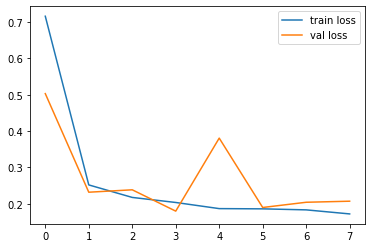

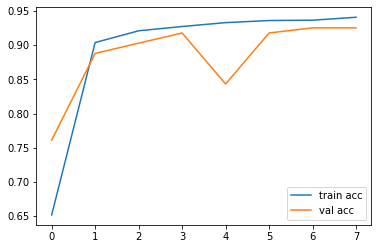

<Figure size 432x288 with 0 Axes>

In [ ]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('model_vgg19_Main.h5')

In [ ]:

y_pred = model.predict(test_set)


In [ ]:
y_pred

array([[9.93561149e-01, 6.43880665e-03],
       [7.12722307e-03, 9.92872715e-01],
       [8.94546330e-01, 1.05453685e-01],
       [4.34827618e-03, 9.95651782e-01],
       [9.99935269e-01, 6.47263150e-05],
       [7.11499631e-01, 2.88500309e-01],
       [9.93679523e-01, 6.32047374e-03],
       [4.99436736e-01, 5.00563264e-01],
       [4.10072552e-03, 9.95899260e-01],
       [1.45915359e-01, 8.54084611e-01],
       [8.90707970e-03, 9.91092861e-01],
       [1.62152816e-02, 9.83784676e-01],
       [9.95410860e-01, 4.58914321e-03],
       [1.66813154e-02, 9.83318686e-01],
       [9.81853783e-01, 1.81462057e-02],
       [3.64331268e-02, 9.63566899e-01],
       [6.96771741e-02, 9.30322766e-01],
       [9.74814117e-01, 2.51858588e-02],
       [9.95794058e-01, 4.20597708e-03],
       [9.97369766e-01, 2.63026240e-03],
       [1.76707413e-02, 9.82329309e-01],
       [5.34047969e-02, 9.46595132e-01],
       [7.33216712e-03, 9.92667854e-01],
       [7.18370778e-03, 9.92816329e-01],
       [9.846979

In [ ]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [ ]:
y_pred

array([0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 0])

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [ ]:
model=load_model('model_vgg19_Main.h5')

In [ ]:
img=image.load_img('drive/My Drive/Dataset/Test/Uninfected/C3thin_original_IMG_20150608_162922_cell_217.png',target_size=(224,224))



In [ ]:
x=image.img_to_array(img)
x

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32)

In [ ]:
x.shape

(224, 224, 3)

In [ ]:
x=x/255

In [ ]:
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [ ]:
model.predict(img_data)

array([[1., 0.]], dtype=float32)

In [ ]:
a=np.argmax(model.predict(img_data), axis=1)

In [ ]:
if(a==1):
    print("Uninfected")
else:
    print("Infected")

Infected
